In [154]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [189]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[0]   
    A = sigmoid(np.dot(w.T,X)+b)                            
    cost = -1/m*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))       
    dw = 1/m*np.dot(X, (A-Y).T)
    db = 1/m*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    assert(cost.shape == ())  
    grads = {"dw": dw, "db": db}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):    
    costs = []   
    for i in range(num_iterations):    
        
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate*dw
        b -= learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b} 
    grads = {"dw": dw, "db": db}
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)   
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0][i] = 0 if A[0][i]<=0.5 else 1
    
    assert(Y_prediction.shape == (1, m))    
    return Y_prediction

In [190]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    print("Train Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [191]:
import pandas as pd 

data = pd.read_csv('datasets/data.csv',sep=',')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [192]:
def norm_col(data,col):
    data[col]=(data[col]-data[col].mean())/data[col].std()

In [193]:
data = data.drop(['User ID'],axis = 1)
norm_col(data,'EstimatedSalary')
norm_col(data,'Age')
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,-1.779569,-1.488183,0
1,Male,-0.253270,-1.458854,0
2,Female,-1.111813,-0.784307,0
3,Female,-1.016419,-0.373714,0
4,Male,-1.779569,0.183521,0


In [194]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.779569,-1.488183,0
1,1,-0.253270,-1.458854,0
2,0,-1.111813,-0.784307,0
3,0,-1.016419,-0.373714,0
4,1,-1.779569,0.183521,0


In [195]:
data_shf = data.sample(frac=1)
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]
print('test: ',len(test),'train: ',len(train))

test:  80 train:  320


In [196]:
X_train = train.drop(['Purchased'],axis=1).T
y_train = train['Purchased']
X_test = test.drop(['Purchased'],axis=1).T
y_test = test['Purchased']

Cost after iteration 0: 73.935699
Cost after iteration 1: 47.126148
Cost after iteration 2: 39.626913
Cost after iteration 3: 37.672391
Cost after iteration 4: 36.528768
Cost after iteration 5: 35.832989
Cost after iteration 6: 35.454532
Cost after iteration 7: 35.273894
Cost after iteration 8: 35.197271
Cost after iteration 9: 35.167467
Cost after iteration 10: 35.156346
Cost after iteration 11: 35.152142
Cost after iteration 12: 35.150432
Cost after iteration 13: 35.149648
Cost after iteration 14: 35.149236
Cost after iteration 15: 35.148996
Cost after iteration 16: 35.148845
Cost after iteration 17: 35.148747
Cost after iteration 18: 35.148682
Cost after iteration 19: 35.148638
Cost after iteration 20: 35.148608
Cost after iteration 21: 35.148589
Cost after iteration 22: 35.148575
Cost after iteration 23: 35.148566
Cost after iteration 24: 35.148560
Cost after iteration 25: 35.148556
Cost after iteration 26: 35.148553
Cost after iteration 27: 35.148551
Cost after iteration 28: 35.14

Cost after iteration 1468: 35.148547
Cost after iteration 1469: 35.148547
Cost after iteration 1470: 35.148547
Cost after iteration 1471: 35.148547
Cost after iteration 1472: 35.148547
Cost after iteration 1473: 35.148547
Cost after iteration 1474: 35.148547
Cost after iteration 1475: 35.148547
Cost after iteration 1476: 35.148547
Cost after iteration 1477: 35.148547
Cost after iteration 1478: 35.148547
Cost after iteration 1479: 35.148547
Cost after iteration 1480: 35.148547
Cost after iteration 1481: 35.148547
Cost after iteration 1482: 35.148547
Cost after iteration 1483: 35.148547
Cost after iteration 1484: 35.148547
Cost after iteration 1485: 35.148547
Cost after iteration 1486: 35.148547
Cost after iteration 1487: 35.148547
Cost after iteration 1488: 35.148547
Cost after iteration 1489: 35.148547
Cost after iteration 1490: 35.148547
Cost after iteration 1491: 35.148547
Cost after iteration 1492: 35.148547
Cost after iteration 1493: 35.148547
Cost after iteration 1494: 35.148547
C

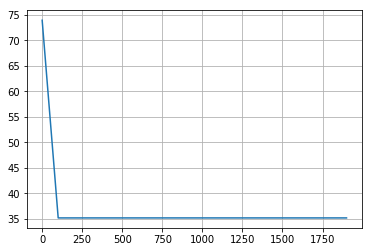

In [197]:
res = model(X_train.values,y_train.values.reshape(y_train.shape[0],-1).T,X_test.values,y_test.values.reshape(y_test.shape[0],-1).T,learning_rate=0.1,num_iterations=2000)
print(res)
costs = res['costs']
plt.grid()
plt.plot([i*100 for i in range(0,len(costs))],costs)
plt.show()

In [198]:
from lr_utils import load_dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


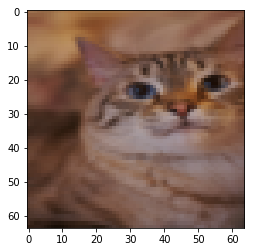

In [199]:
index = 93
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [200]:
train_set_x_reshaped = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
print(train_set_x_reshaped.shape)
train_set_x_flatten= train_set_x_reshaped / 255

(209, 12288)


In [201]:
test_set_x_reshaped = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)
print(test_set_x_reshaped.shape)
test_set_x_flatten = test_set_x_reshaped / 255

(50, 12288)


In [218]:
d = model(train_set_x_flatten.T, train_set_y,test_set_x_flatten.T,test_set_y)

Cost after iteration 0: 0.011789
Cost after iteration 1: 0.016830
Cost after iteration 2: 0.027411
Cost after iteration 3: 0.044142
Cost after iteration 4: 0.011703
Cost after iteration 5: 0.018516
Cost after iteration 6: 0.038485
Cost after iteration 7: 0.010410
Cost after iteration 8: 0.010655
Cost after iteration 9: 0.013519
Cost after iteration 10: 0.028177
Cost after iteration 11: 0.016289
Cost after iteration 12: 0.034950
Cost after iteration 13: 0.010806
Cost after iteration 14: 0.016681
Cost after iteration 15: 0.026039
Cost after iteration 16: 0.042170
Cost after iteration 17: 0.010356
Cost after iteration 18: 0.014840
Cost after iteration 19: 0.031950
Cost after iteration 20: 0.011830
Cost after iteration 21: 0.023172
Cost after iteration 22: 0.019930
Cost after iteration 23: 0.038574
Cost after iteration 24: 0.009379
Cost after iteration 25: 0.009416
Cost after iteration 26: 0.010093
Cost after iteration 27: 0.015134
Cost after iteration 28: 0.032322
Cost after iteration 29:

Cost after iteration 312: 0.013065
Cost after iteration 313: 0.009335
Cost after iteration 314: 0.012981
Cost after iteration 315: 0.009302
Cost after iteration 316: 0.012898
Cost after iteration 317: 0.009268
Cost after iteration 318: 0.012815
Cost after iteration 319: 0.009235
Cost after iteration 320: 0.012732
Cost after iteration 321: 0.009202
Cost after iteration 322: 0.012650
Cost after iteration 323: 0.009168
Cost after iteration 324: 0.012568
Cost after iteration 325: 0.009134
Cost after iteration 326: 0.012486
Cost after iteration 327: 0.009100
Cost after iteration 328: 0.012405
Cost after iteration 329: 0.009067
Cost after iteration 330: 0.012324
Cost after iteration 331: 0.009033
Cost after iteration 332: 0.012243
Cost after iteration 333: 0.008998
Cost after iteration 334: 0.012163
Cost after iteration 335: 0.008964
Cost after iteration 336: 0.012083
Cost after iteration 337: 0.008930
Cost after iteration 338: 0.012004
Cost after iteration 339: 0.008896
Cost after iteration

Cost after iteration 640: 0.003521
Cost after iteration 641: 0.003477
Cost after iteration 642: 0.003494
Cost after iteration 643: 0.003453
Cost after iteration 644: 0.003468
Cost after iteration 645: 0.003429
Cost after iteration 646: 0.003443
Cost after iteration 647: 0.003406
Cost after iteration 648: 0.003418
Cost after iteration 649: 0.003384
Cost after iteration 650: 0.003394
Cost after iteration 651: 0.003362
Cost after iteration 652: 0.003371
Cost after iteration 653: 0.003340
Cost after iteration 654: 0.003348
Cost after iteration 655: 0.003320
Cost after iteration 656: 0.003326
Cost after iteration 657: 0.003299
Cost after iteration 658: 0.003304
Cost after iteration 659: 0.003279
Cost after iteration 660: 0.003283
Cost after iteration 661: 0.003260
Cost after iteration 662: 0.003263
Cost after iteration 663: 0.003241
Cost after iteration 664: 0.003244
Cost after iteration 665: 0.003223
Cost after iteration 666: 0.003225
Cost after iteration 667: 0.003206
Cost after iteration

Cost after iteration 982: 0.002377
Cost after iteration 983: 0.002375
Cost after iteration 984: 0.002374
Cost after iteration 985: 0.002372
Cost after iteration 986: 0.002371
Cost after iteration 987: 0.002369
Cost after iteration 988: 0.002368
Cost after iteration 989: 0.002366
Cost after iteration 990: 0.002365
Cost after iteration 991: 0.002363
Cost after iteration 992: 0.002362
Cost after iteration 993: 0.002360
Cost after iteration 994: 0.002359
Cost after iteration 995: 0.002357
Cost after iteration 996: 0.002355
Cost after iteration 997: 0.002354
Cost after iteration 998: 0.002352
Cost after iteration 999: 0.002351
Cost after iteration 1000: 0.002349
Cost after iteration 1001: 0.002348
Cost after iteration 1002: 0.002346
Cost after iteration 1003: 0.002345
Cost after iteration 1004: 0.002343
Cost after iteration 1005: 0.002342
Cost after iteration 1006: 0.002340
Cost after iteration 1007: 0.002339
Cost after iteration 1008: 0.002337
Cost after iteration 1009: 0.002336
Cost after

Cost after iteration 1328: 0.001937
Cost after iteration 1329: 0.001936
Cost after iteration 1330: 0.001935
Cost after iteration 1331: 0.001934
Cost after iteration 1332: 0.001933
Cost after iteration 1333: 0.001932
Cost after iteration 1334: 0.001931
Cost after iteration 1335: 0.001930
Cost after iteration 1336: 0.001929
Cost after iteration 1337: 0.001928
Cost after iteration 1338: 0.001927
Cost after iteration 1339: 0.001926
Cost after iteration 1340: 0.001925
Cost after iteration 1341: 0.001924
Cost after iteration 1342: 0.001923
Cost after iteration 1343: 0.001922
Cost after iteration 1344: 0.001921
Cost after iteration 1345: 0.001920
Cost after iteration 1346: 0.001919
Cost after iteration 1347: 0.001918
Cost after iteration 1348: 0.001917
Cost after iteration 1349: 0.001916
Cost after iteration 1350: 0.001915
Cost after iteration 1351: 0.001913
Cost after iteration 1352: 0.001912
Cost after iteration 1353: 0.001911
Cost after iteration 1354: 0.001910
Cost after iteration 1355: 0

Cost after iteration 1639: 0.001658
Cost after iteration 1640: 0.001657
Cost after iteration 1641: 0.001656
Cost after iteration 1642: 0.001655
Cost after iteration 1643: 0.001655
Cost after iteration 1644: 0.001654
Cost after iteration 1645: 0.001653
Cost after iteration 1646: 0.001652
Cost after iteration 1647: 0.001652
Cost after iteration 1648: 0.001651
Cost after iteration 1649: 0.001650
Cost after iteration 1650: 0.001649
Cost after iteration 1651: 0.001649
Cost after iteration 1652: 0.001648
Cost after iteration 1653: 0.001647
Cost after iteration 1654: 0.001646
Cost after iteration 1655: 0.001646
Cost after iteration 1656: 0.001645
Cost after iteration 1657: 0.001644
Cost after iteration 1658: 0.001643
Cost after iteration 1659: 0.001642
Cost after iteration 1660: 0.001642
Cost after iteration 1661: 0.001641
Cost after iteration 1662: 0.001640
Cost after iteration 1663: 0.001639
Cost after iteration 1664: 0.001639
Cost after iteration 1665: 0.001638
Cost after iteration 1666: 0

Cost after iteration 1955: 0.001443
Cost after iteration 1956: 0.001443
Cost after iteration 1957: 0.001442
Cost after iteration 1958: 0.001442
Cost after iteration 1959: 0.001441
Cost after iteration 1960: 0.001440
Cost after iteration 1961: 0.001440
Cost after iteration 1962: 0.001439
Cost after iteration 1963: 0.001439
Cost after iteration 1964: 0.001438
Cost after iteration 1965: 0.001437
Cost after iteration 1966: 0.001437
Cost after iteration 1967: 0.001436
Cost after iteration 1968: 0.001436
Cost after iteration 1969: 0.001435
Cost after iteration 1970: 0.001434
Cost after iteration 1971: 0.001434
Cost after iteration 1972: 0.001433
Cost after iteration 1973: 0.001433
Cost after iteration 1974: 0.001432
Cost after iteration 1975: 0.001432
Cost after iteration 1976: 0.001431
Cost after iteration 1977: 0.001430
Cost after iteration 1978: 0.001430
Cost after iteration 1979: 0.001429
Cost after iteration 1980: 0.001429
Cost after iteration 1981: 0.001428
Cost after iteration 1982: 0

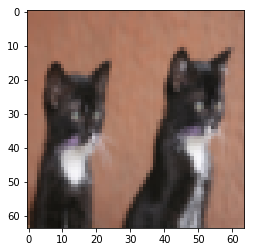

[[1.]]


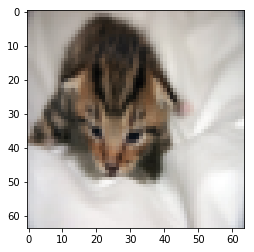

[[1.]]


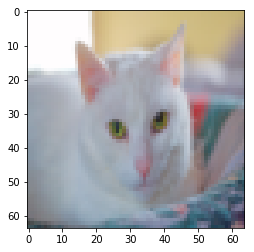

[[1.]]


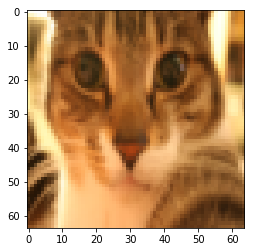

[[1.]]


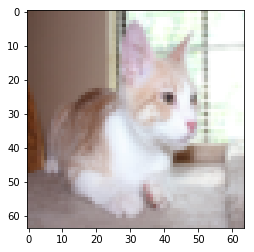

[[1.]]


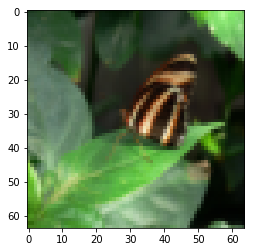

[[1.]]


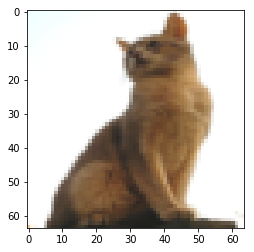

[[0.]]


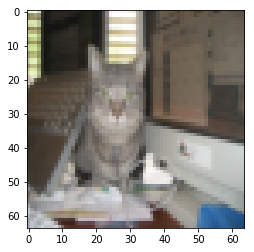

[[1.]]


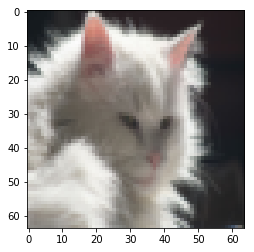

[[1.]]


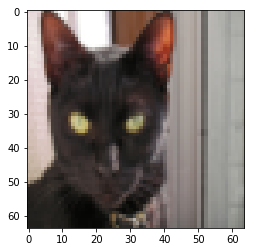

[[1.]]


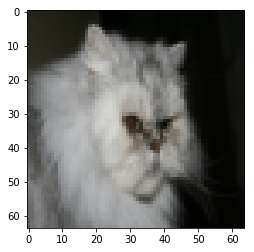

[[0.]]


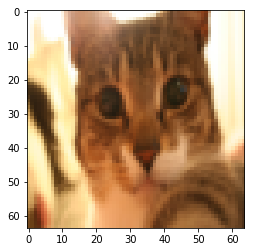

[[0.]]


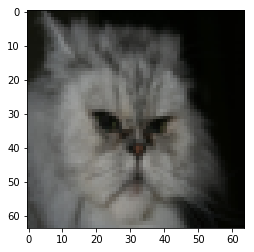

[[1.]]


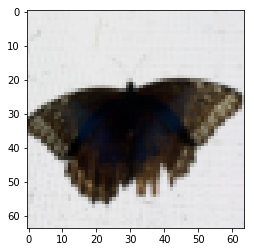

[[1.]]


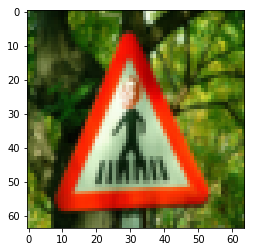

[[0.]]


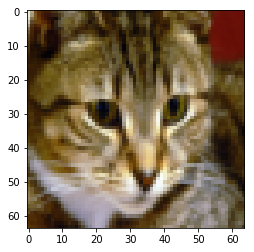

[[1.]]


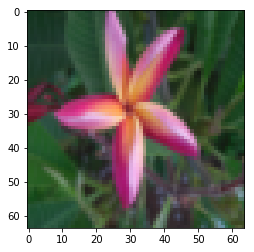

[[0.]]


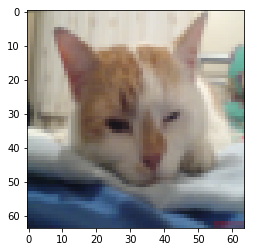

[[1.]]


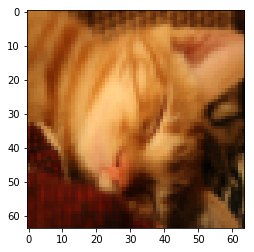

[[0.]]


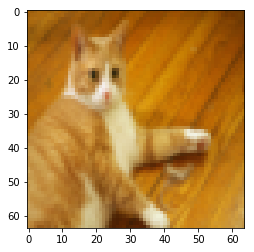

[[0.]]


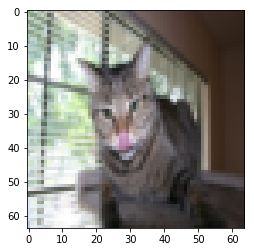

[[1.]]


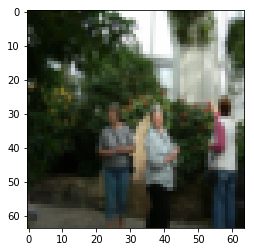

[[0.]]


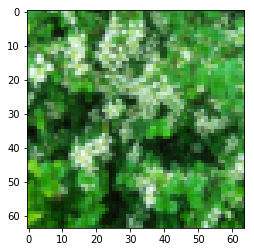

[[0.]]


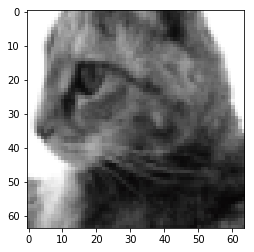

[[1.]]


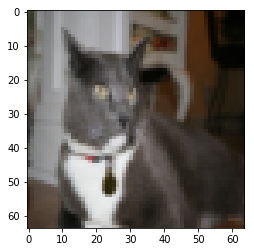

[[1.]]


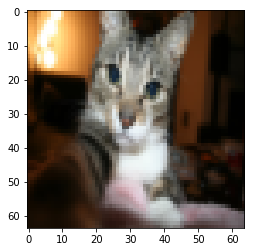

[[1.]]


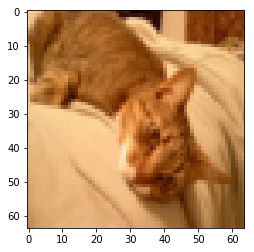

[[1.]]


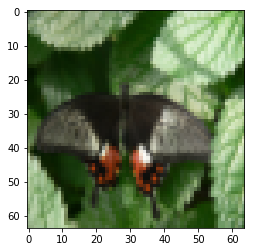

[[0.]]


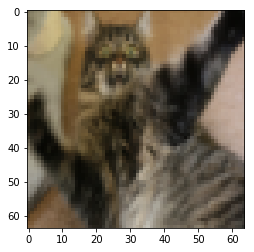

[[0.]]


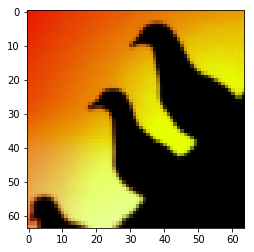

[[1.]]


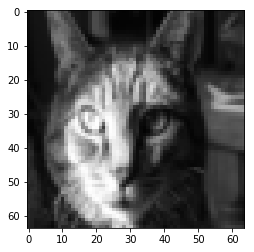

[[0.]]


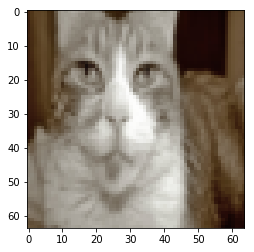

[[1.]]


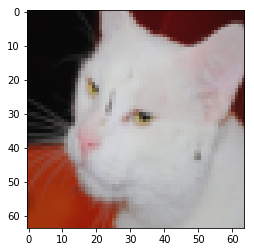

[[1.]]


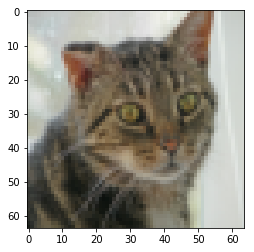

[[1.]]


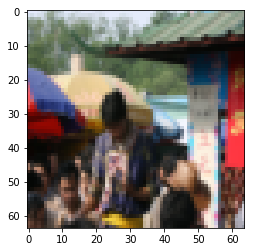

[[1.]]


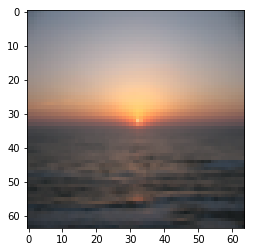

[[0.]]


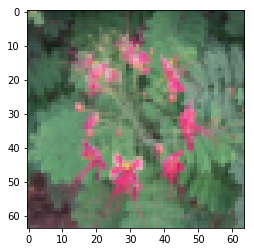

[[0.]]


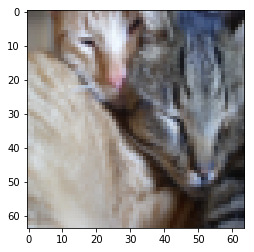

[[1.]]


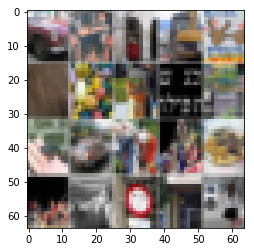

[[0.]]


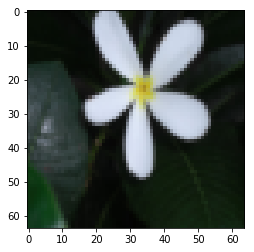

[[0.]]


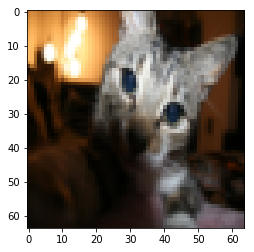

[[1.]]


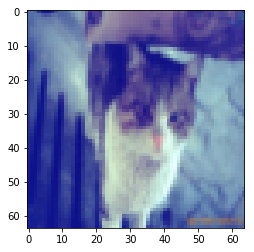

[[0.]]


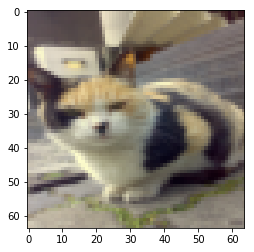

[[1.]]


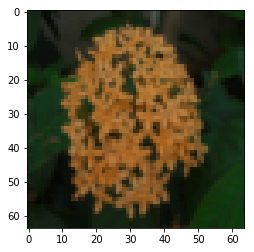

[[0.]]


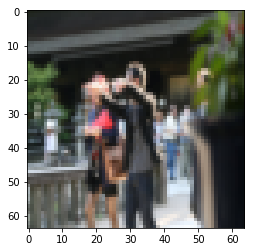

[[1.]]


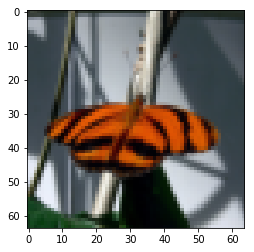

[[1.]]


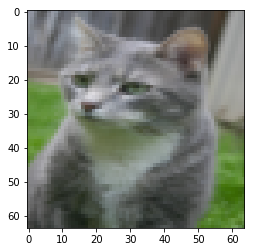

[[0.]]


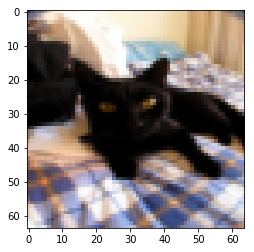

[[1.]]


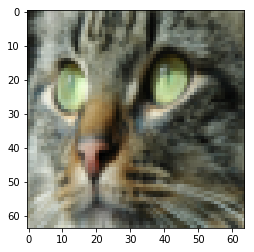

[[1.]]


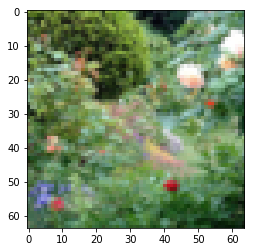

[[0.]]


In [231]:
for i,x in enumerate(test_set_x_flatten):
    plt.imshow(test_set_x_orig[i])
    plt.show()
    print(predict(d['w'], d['b'], x.reshape(12288,1)))

In [116]:
train_set_x_reshaped.T[0:3]

array([[0.06666667, 0.76862745, 0.32156863, 0.00392157, 0.03529412,
        0.32941176, 0.21960784, 0.0745098 , 0.24705882, 0.09019608,
        0.7372549 , 0.01568627, 0.60392157, 0.06666667, 0.28235294,
        0.96078431, 0.99215686, 0.85098039, 0.54901961, 0.00784314,
        0.01960784, 0.06666667, 0.64313725, 0.61176471, 0.47843137,
        0.05882353, 0.30588235, 0.14117647, 0.05490196, 0.70588235,
        0.15294118, 0.74509804, 0.91372549, 0.50588235, 0.5372549 ,
        0.10196078, 0.09019608, 0.36862745, 0.24705882, 0.44313725,
        0.46666667, 0.00392157, 0.24705882, 1.        , 0.23921569,
        0.        , 0.25098039, 0.2       , 0.08235294, 0.22352941,
        0.64313725, 0.59607843, 0.41568627, 0.15686275, 0.05882353,
        1.        , 0.12156863, 0.55294118, 0.20392157, 0.29411765,
        0.31764706, 0.49019608, 0.38823529, 0.36862745, 0.00784314,
        0.3372549 , 0.88627451, 0.29803922, 0.54509804, 0.16862745,
        0.09411765, 0.02745098, 0.05098039, 0.40